## Introduction to Barnsley Fern

The homework assignment for this week is to write code that uses principles similar to the **chaos game** from the laboratory to create even more interesting images, in this case, the famous "Barnsley Fern"(https://en.wikipedia.org/wiki/Barnsley_fern)

The method to generate the fern is similar to the chaos game in that we repeatedly make a random choice, and use that choice to update the current point to a new point, and the collection of points will form an interesting image.  However, instead of selecting among vertices, to create the Barnsley fern we will be selecting at random among **affine transformations**.  There are four such transformations, each one of the form:
$$
\left[ \begin{array}{r} x' \\ y' \end{array} \right] = \left[ \begin{array}{rr} a & b \\ c & d \end{array} \right] \left[ \begin{array}{r} x \\ y \end{array} \right] + \left[ \begin{array}{r} e \\ f \end{array} \right].
$$
Here, $(x,y)$ and $(x',y')$ are the Cartesian coordinates of the current and new point, respectively, $(a,b,c,d)$ are four numbers that define a $2 \times 2$ matrix, and $(e,f)$ are two numbers that define a $1 \times 2$ vector.  This transformation is two-dimensional analog of the one-dimensional affine function $x' = m x + b$ with scalar (slope) $m$ and scalar ($y$-intercept) $b$.  Note that the transformation is defined by the six parameters $(a,b,c,d,e,f)$.  The four transformations are:
$$
\begin{array}{r|rrrrrr}
f & a & b & c & d & e & f \\ \hline
f_1 & 0 & 0 & 0 & 0.16 & 0 & 0\\
f_2 & 0.85 & 0.04 & -0.04 & 0.85 & 0 & 1.60 \\
f_3 & 0.20 & -0.26 & 0.23 & 0.22 & 0 & 1.60 \\
f_4 & -0.15 & 0.28 & 0.26 & 0.24 & 0 & 0.44
\end{array}
$$
Finally, the following weight vector gives the probabilities to be used when selecting one of these affine transformations at random:
$$
w = \left[ \begin{array}{cccc} 0.01 & 0.85 & 0.07 & 0.07 \end{array} \right].
$$
The initial point may be chosen to be the origin $(0,0)$, without loss of generality. The number of points may be selected as $N = 10^5$, although it is worth investigating how the resulting image changes for, say $10^2, 10^3, 10^4$ points. 

The dynamics are very simple: starting with $(x,y) = (0,0)$, repeatedly update the point $N$ times by:

1) Select a transformation at random using weights $w$

2) Update the point by applying the selected transformation to the current point $(x,y)$ 

Plotting the resulting sequence of $N$ points should produce the Barnsley fern.

**There are two objectives for the homework:**

1) Practice working with iterated dynamic systems, similar to the chaos game of the lab, and the examples from the lecture.

2) Gain exposure to and experience with famous fractals, such as the Barnsley fern.


## Starter code :

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
"""
chaos_game: generate the points for the chaos game
Inputs:
p0: initial point (x0,y0)
w: weights for random selection of the affine transformations
f: affine transformations
inum: number of iterations / points
"""
def chaos_game(p0, w, f, inum):
    #initialize empty list of points for each transform
    p = [[] for _ in range(len(f))]
    # initialize current point cp to be initial point p0
    cp = p0
    # repeatedly select next point using last point as input
    for _ in range(inum):
        # chooses a random index ir using weights w
        ir = np.random.choice(range(len(f)),p=w)
        # update the current point using the corresponding transform
        cp = f[ir].transform(cp)
        # append the current point to the appropriate list of points
        p[ir].append(cp)
    return p # return points

"""
plot_pts: plot of the points p
Inputs:
p: points
filename: save plot as filename
"""
def plot_pts(p, filename):
    pa = [np.array(pi) for pi in p]
    # choose the colors for the points under the four transforms
    colors = ['b','g','r','k']
    plt.figure()
    # plot the points
    [plt.scatter(pai[:,1],pai[:,0], s=0.01, c=ci) for pai,ci in zip(pa,colors)]
    plt.gca().set_aspect('equal') # ensure aspect ratio is one
    plt.savefig(filename)
    plt.show()

### Define the following class for the HW:

In [3]:
"""
class affine_transformation:
attributes:
M: a 2 x 2 array
b: a 2 x 1 vector
methods:
transform: apply the transformation to the current point (z) to yield a point M z + b
"""
class affine_transformation():
    # constructor: set attributes M and b using arguments
    def __init__(self,a,b,c,d,e,f):
        self.a=a
        self.b=b
        self.c=c
        self.d=d
        self.e=e
        self.f=f
        self.M=np.array([[self.a, self.b],
           [self.c, self.d]])
        self.B=np.array([[self.e],
           [self.f]])
      


    def transform(self,z):
          
        
      
        return self.M.dot(z)+self.B
   
    
    

### Main script

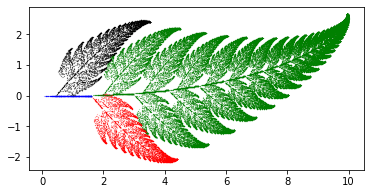

In [4]:
"""
Four affine transformations and a weight vector:
w: weights on the four affine transformations f1, f2, f3, f4, where for each iteration a transformation is selected at random with weights w
f1, f2, f3, f4: four affine transformations, each consisting of a 2 x 2 matrix M and a 1 x 2 vector b, so that the new point is z_new = M * z_old + b
"""
w = np.array([0.01, 0.85, 0.07, 0.07])
f1 = affine_transformation( 0.00, 0.00, 0.00, 0.16, 0.00, 0.00)
f2 = affine_transformation( 0.85, 0.04,-0.04, 0.85, 0.00, 1.60)
f3 = affine_transformation( 0.20,-0.26, 0.23, 0.22, 0.00, 1.60)
f4 = affine_transformation(-0.15, 0.28, 0.26, 0.24, 0.00, 0.44)
f = [f1, f2, f3, f4]

"""
p0 = (0,0): initial point
inum: number of iterations
"""
p0 = np.array([[0],[0]])
inum = 100000
filename = 'Homework6.pdf'

"""
create the points p using chaos_game
plot them using plot_pts
"""
p = chaos_game(p0, w, f, inum) # generate the points
plot_pts(p, filename) # plot the points